# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
query_url = url + "&appid=" + weather_api_key + "&units=" + unit + "&q=" 

CityName = []
Temperature_F = []
Latitude = []
Humidity = []
Cloudiness = []
WindSpeed = []
CountryNames = []
Dates = []
Longtitude = []
Count = 0
SetCount = 1

print("Beginning Data Retrieval")
print("------------------------------")

for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        Temperature_F.append(response["main"]["temp_max"])
        Latitude.append(response["coord"]["lat"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        WindSpeed.append(response["wind"]["speed"])
        CountryNames.append(response["sys"]["country"])
        Dates.append(response["dt"])
        Longtitude.append(response["coord"]["lon"])

        if Count > 48:
            Count = 1
            SetCount += 1
            CityName.append(city)
        else:
            Count += 1
            CityName.append(city)
        print(f"Processing Record {Count} of Set {SetCount} | {city}")
    
    except:
        print("City not found. Skipping...")

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | muhos
Processing Record 2 of Set 1 | beyneu
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | hermanus
City not found. Skipping...
Processing Record 5 of Set 1 | vila franca do campo
City not found. Skipping...
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | kahului
Processing Record 9 of Set 1 | sao joao da barra
City not found. Skipping...
Processing Record 10 of Set 1 | tyup
Processing Record 11 of Set 1 | vaini
City not found. Skipping...
Processing Record 12 of Set 1 | kalengwa
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | westerland
Processing Record 18 of Set 1 | souillac
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | nhulunbuy
Processing Reco

Processing Record 37 of Set 4 | abha
Processing Record 38 of Set 4 | baft
Processing Record 39 of Set 4 | itarema
Processing Record 40 of Set 4 | tiksi
City not found. Skipping...
Processing Record 41 of Set 4 | tagusao
Processing Record 42 of Set 4 | marzuq
Processing Record 43 of Set 4 | imbituba
Processing Record 44 of Set 4 | burns lake
Processing Record 45 of Set 4 | bandarbeyla
Processing Record 46 of Set 4 | penhold
Processing Record 47 of Set 4 | srednekolymsk
City not found. Skipping...
Processing Record 48 of Set 4 | ancud
City not found. Skipping...
Processing Record 49 of Set 4 | tuatapere
City not found. Skipping...
Processing Record 1 of Set 5 | san carlos de bariloche
Processing Record 2 of Set 5 | rawah
Processing Record 3 of Set 5 | san quintin
Processing Record 4 of Set 5 | san cristobal
Processing Record 5 of Set 5 | wagga wagga
Processing Record 6 of Set 5 | asau
Processing Record 7 of Set 5 | caravelas
Processing Record 8 of Set 5 | qaqortoq
Processing Record 9 of 

Processing Record 32 of Set 8 | pakdasht
Processing Record 33 of Set 8 | parrita
Processing Record 34 of Set 8 | iroquois falls
Processing Record 35 of Set 8 | campos belos
City not found. Skipping...
Processing Record 36 of Set 8 | duzce
Processing Record 37 of Set 8 | obihiro
Processing Record 38 of Set 8 | reidsville
Processing Record 39 of Set 8 | mtwara
Processing Record 40 of Set 8 | jaguey grande
Processing Record 41 of Set 8 | nouadhibou
Processing Record 42 of Set 8 | kihei
Processing Record 43 of Set 8 | abu samrah
Processing Record 44 of Set 8 | madina
Processing Record 45 of Set 8 | mata
Processing Record 46 of Set 8 | madang
Processing Record 47 of Set 8 | creutzwald
Processing Record 48 of Set 8 | maldonado
City not found. Skipping...
Processing Record 49 of Set 8 | rundu
Processing Record 1 of Set 9 | terney
Processing Record 2 of Set 9 | rawson
City not found. Skipping...
Processing Record 3 of Set 9 | padampur
Processing Record 4 of Set 9 | privolzhye
City not found. S

Processing Record 21 of Set 12 | muzambinho
Processing Record 22 of Set 12 | ust-ishim
Processing Record 23 of Set 12 | anadyr
Processing Record 24 of Set 12 | comodoro rivadavia
City not found. Skipping...
Processing Record 25 of Set 12 | valparaiso
Processing Record 26 of Set 12 | portland
Processing Record 27 of Set 12 | pyapon
Processing Record 28 of Set 12 | sayyan
City not found. Skipping...
City not found. Skipping...
Processing Record 29 of Set 12 | yinchuan
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
WeatherDict = {"City": CityName,
    "Cloudiness": Cloudiness,
    "Country": CountryNames,
    "Date": Dates,
    "Humidity": Humidity,
    "Lat": Latitude,
    "Lng": Longtitude,
    "Max Temp": Temperature_F,
    "Wind Speed": WindSpeed}

WeatherData = pd.DataFrame(WeatherDict)
WeatherData.index.name = "City_ID"

WeatherData.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,muhos,0,FI,1647875340,77,64.8080,25.9931,42.58,9.17
1,beyneu,26,KZ,1647875341,59,45.3167,55.2000,37.04,14.97
2,tasiilaq,0,GL,1647875341,56,65.6145,-37.6368,21.36,3.38
3,hermanus,0,ZA,1647875341,67,-34.4187,19.2345,78.80,17.36
4,vila franca do campo,64,PT,1647875343,67,37.7167,-25.4333,61.20,16.35


In [5]:
# output data to csv
WeatherData.to_csv(output_data_file)

In [23]:
WeatherData.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,568.00000,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000
mean,57.27993,1.647876e+09,68.211268,21.415656,20.071120,56.879296,8.972746
std,39.61923,1.188798e+02,23.572944,32.722060,89.918389,27.416091,6.410461
min,0.00000,1.647875e+09,1.000000,-54.800000,-175.200000,-32.780000,0.000000
25%,16.00000,1.647875e+09,54.000000,-3.615150,-57.813025,38.977500,3.670000
50%,69.50000,1.647875e+09,74.500000,25.406600,26.394700,63.410000,7.900000
75%,99.00000,1.647876e+09,86.000000,48.679150,95.794600,78.785000,12.660000
max,100.00000,1.647876e+09,100.000000,78.218600,179.316700,107.260000,45.370000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
WeatherData["Humidity"].max()
#Skipping filtering since highest is not above 100

100

In [7]:
#  Get the indices of cities that have humidity over 100%.
#Skipping 

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#Skipping 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

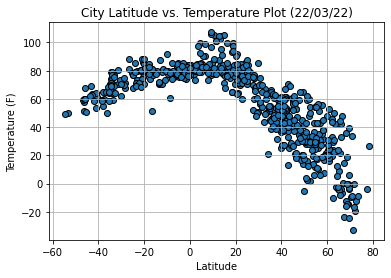

In [9]:
TodayDate = time.strftime("%d/%m/%y")
plt.scatter(WeatherData["Lat"],WeatherData["Max Temp"],edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.title(f"City Latitude vs. Temperature Plot ({TodayDate})")
plt.savefig("output_data/Latitude_vs_Temperature_Plot.png")

## Latitude vs. Humidity Plot

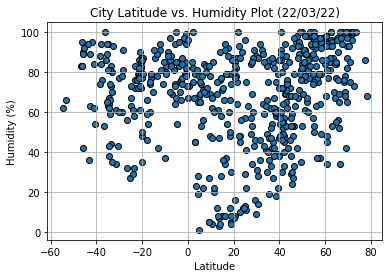

In [10]:
plt.scatter(WeatherData["Lat"],WeatherData["Humidity"],edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.title(f"City Latitude vs. Humidity Plot ({TodayDate})")
plt.savefig("output_data/Latitude_vs_Humidity_Plot.png")

## Latitude vs. Cloudiness Plot

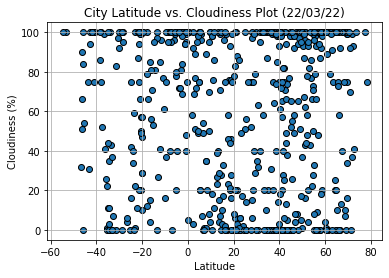

In [11]:
plt.scatter(WeatherData["Lat"],WeatherData["Cloudiness"],edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.title(f"City Latitude vs. Cloudiness Plot ({TodayDate})")
plt.savefig("output_data/Latitude_vs_Cloudiness_Plot.png")

## Latitude vs. Wind Speed Plot

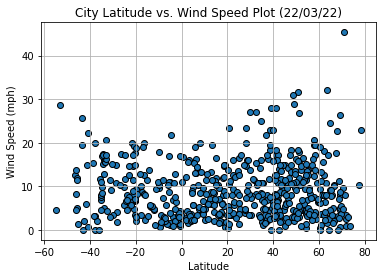

In [12]:
plt.scatter(WeatherData["Lat"],WeatherData["Wind Speed"], edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.title(f"City Latitude vs. Wind Speed Plot ({TodayDate})")
plt.savefig("output_data/Latitude_vs_Wind_Speed_Plot.png")

## Linear Regression

In [13]:
#Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
NorthernData = WeatherData.loc[(WeatherData["Lat"] >= 0)]
NorthernData.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,muhos,0,FI,1647875340,77,64.8080,25.9931,42.58,9.17
1,beyneu,26,KZ,1647875341,59,45.3167,55.2000,37.04,14.97
2,tasiilaq,0,GL,1647875341,56,65.6145,-37.6368,21.36,3.38
4,vila franca do campo,64,PT,1647875343,67,37.7167,-25.4333,61.20,16.35
6,albany,71,US,1647875344,69,42.6001,-73.9662,46.81,13.91


In [14]:
#Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
SouthernData = WeatherData.loc[(WeatherData["Lat"] < 0)]
SouthernData.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
3,hermanus,0,ZA,1647875341,67,-34.4187,19.2345,78.80,17.36
5,lebu,52,CL,1647875343,76,-37.6167,-73.6500,60.17,3.24
8,sao joao da barra,87,BR,1647875344,79,-21.6403,-41.0511,73.49,19.91
10,vaini,100,TO,1647875346,80,-21.2000,-175.2000,79.59,14.58
11,kalengwa,100,ZM,1647875348,89,-13.4659,25.0027,70.29,5.35


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7652772500411574


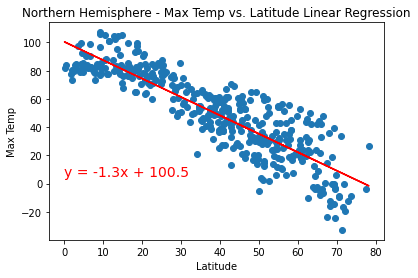

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(NorthernData["Lat"], NorthernData["Max Temp"])
regress_values = NorthernData["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(NorthernData["Lat"], NorthernData["Max Temp"])
plt.plot(NorthernData["Lat"], regress_values, color='red')
plt.annotate(line_eq,(0,5), color="red", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Northern_Hemisphere_Latitude_vs_Temperature_Plot.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.47873375080280217


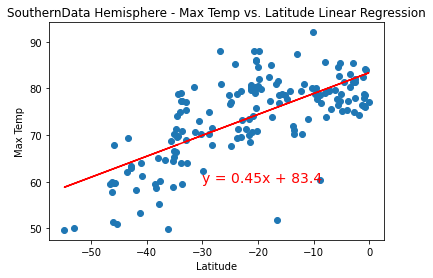

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(SouthernData["Lat"], SouthernData["Max Temp"])
regress_values = SouthernData["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(SouthernData["Lat"], SouthernData["Max Temp"])
plt.plot(SouthernData["Lat"], regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-30,60), color="red", fontsize=14)
plt.title("SouthernData Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/SouthernData_Hemisphere_Latitude_vs_Temperature_Plot.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15502243856386957


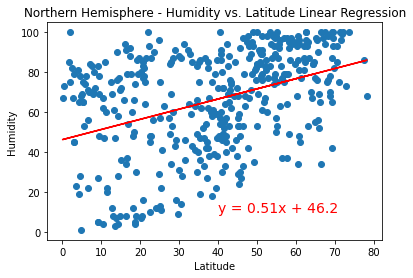

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(NorthernData["Lat"], NorthernData["Humidity"])
regress_values = NorthernData["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(NorthernData["Lat"], NorthernData["Humidity"])
plt.plot(NorthernData["Lat"], regress_values, color='red')
plt.annotate(line_eq,(40,10), color="red", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Northern_Hemisphere_Latitude_vs_Humidity_Plot.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03848116590994822


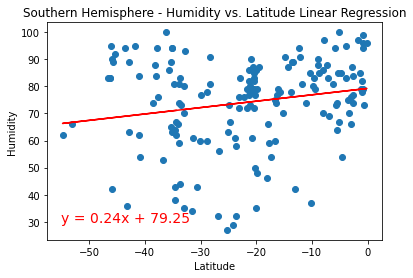

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(SouthernData["Lat"], SouthernData["Humidity"])
regress_values = SouthernData["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(SouthernData["Lat"], SouthernData["Humidity"])
plt.plot(SouthernData["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-55,30), color="red", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Southern_Hemisphere_Latitude_vs_Humidity_Plot.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.018226745333956764


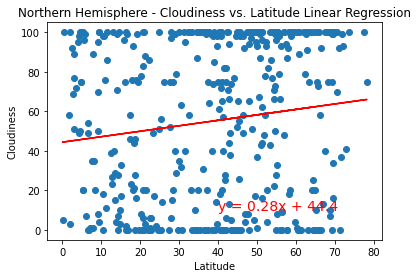

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(NorthernData["Lat"], NorthernData["Cloudiness"])
regress_values = NorthernData["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(NorthernData["Lat"], NorthernData["Cloudiness"])
plt.plot(NorthernData["Lat"], regress_values, color='red')
plt.annotate(line_eq,(40,10), color="red", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Northern_Hemisphere_Latitude_vs_Cloudiness_Plot.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06796303962507289


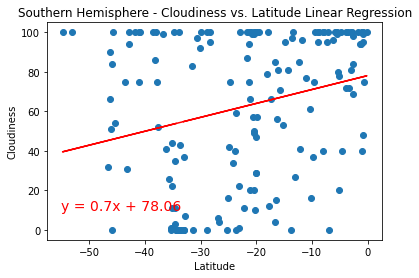

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(SouthernData["Lat"], SouthernData["Cloudiness"])
regress_values = SouthernData["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(SouthernData["Lat"], SouthernData["Cloudiness"])
plt.plot(SouthernData["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-55,10), color="red", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Southern_Hemisphere_Latitude_vs_Cloudiness_Plot.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0026834182813730407


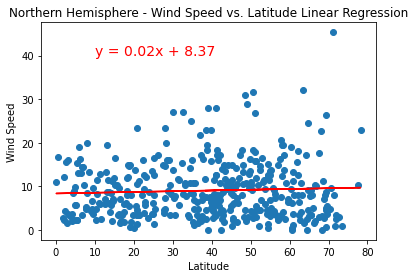

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(NorthernData["Lat"], NorthernData["Wind Speed"])
regress_values = NorthernData["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(NorthernData["Lat"], NorthernData["Wind Speed"])
plt.plot(NorthernData["Lat"], regress_values, color='red')
plt.annotate(line_eq,(10,40), color="red", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Northern_Hemisphere_Latitude_vs_Wind_Speed_Plot.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09266286397872166


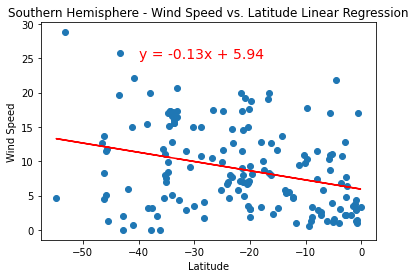

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(SouthernData["Lat"], SouthernData["Wind Speed"])
regress_values = SouthernData["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(SouthernData["Lat"], SouthernData["Wind Speed"])
plt.plot(SouthernData["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-40,25), color="red", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Southern_Hemisphere_Latitude_vs_Wind_Speed_Plot.png")